In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')
print(data.shape)
data.describe()

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.

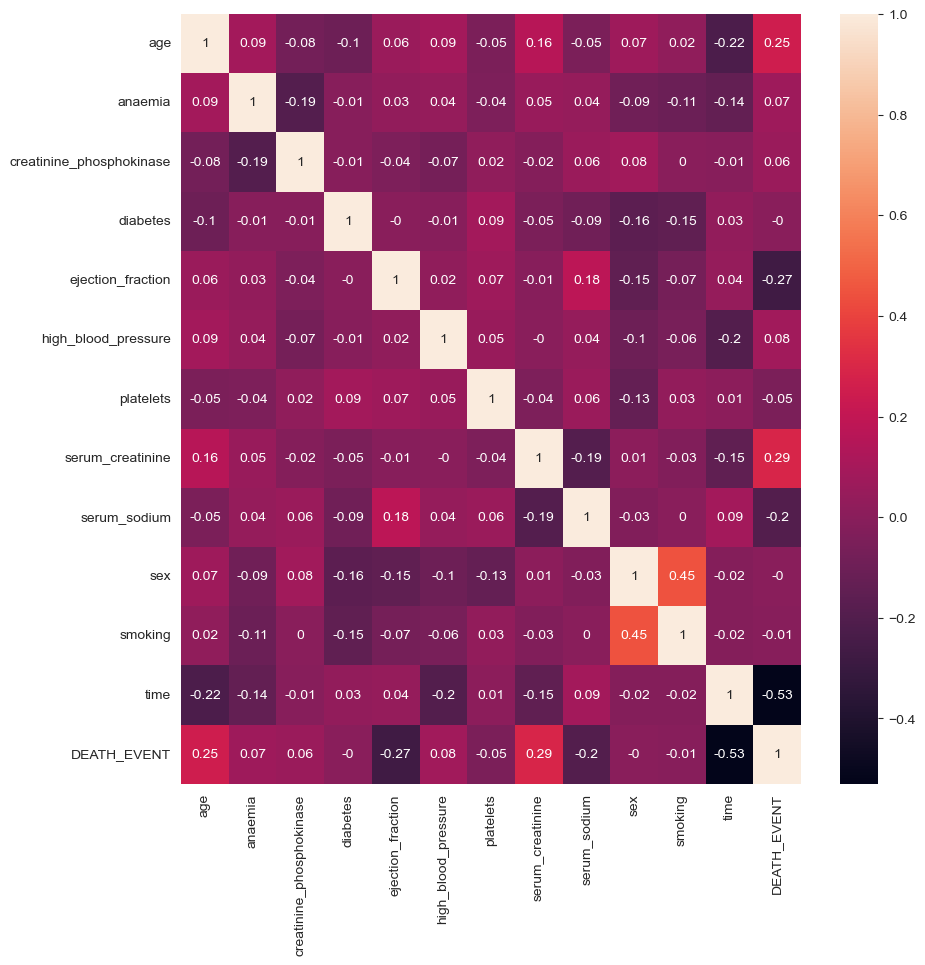

In [14]:
print(data.corr())
plt.figure(figsize=(10,10))
sns.heatmap(np.round(data.corr(),2),annot=True)
plt.savefig('corr.png')

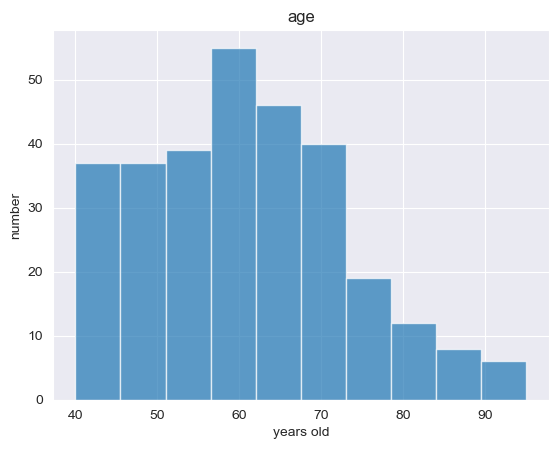

In [20]:
plt.hist(data.age,alpha=0.7)
plt.title('age')
plt.xlabel('years old')
plt.ylabel('number')
plt.savefig('age.png')
plt.show()

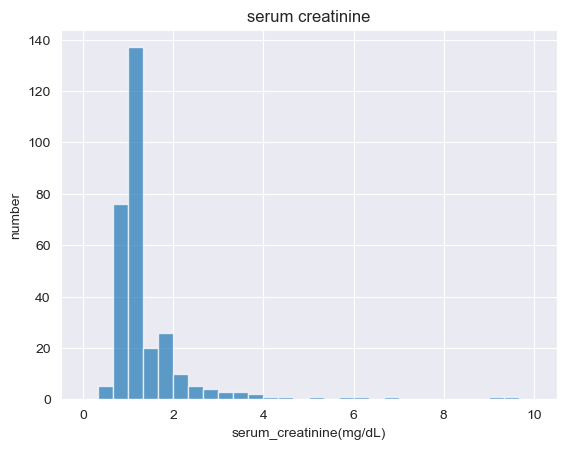

In [40]:
plt.hist(data.serum_creatinine,alpha=0.7,bins=30,range=(0,10))
plt.title('serum creatinine')
plt.xlabel('serum_creatinine(mg/dL)')
plt.ylabel('number')
plt.savefig('serum_creatinine.png')
plt.show()

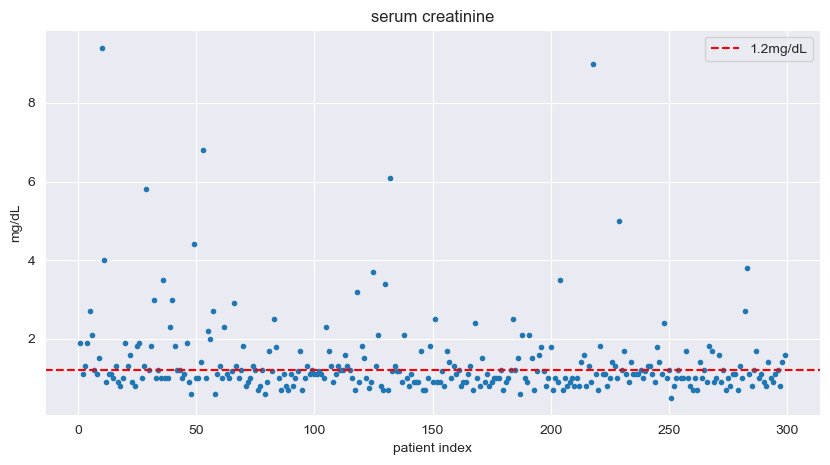

In [44]:
plt.figure(figsize=(10,5))
plt.scatter(np.linspace(1,299,299,endpoint=True),data.serum_creatinine,marker='.')
plt.axhline(1.2,color='red',linestyle='--',label='1.2mg/dL')
plt.title('serum creatinine')
plt.xlabel('patient index')
plt.ylabel('mg/dL')
plt.savefig('serum_creatinine.png')
plt.legend()
plt.show()

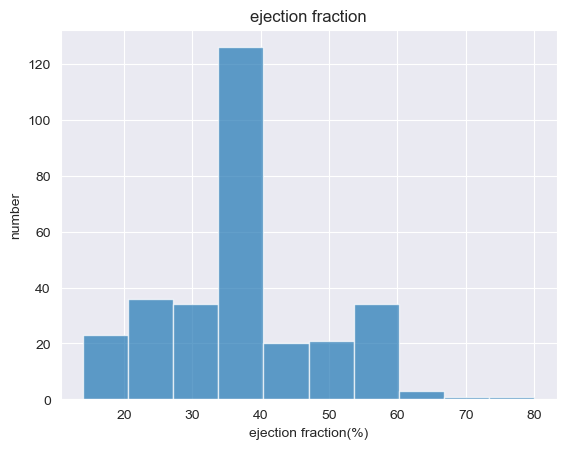

In [25]:
plt.hist(data.ejection_fraction,alpha=0.7)
plt.title('ejection fraction')
plt.xlabel('ejection fraction(%)')
plt.ylabel('number')
plt.savefig('ejection_fraction.png')
plt.show()

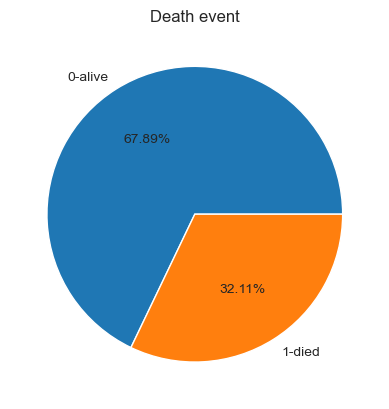

In [70]:
ratio=data.DEATH_EVENT.value_counts()
# print(ratio[0],ratio[1])
# print(data.DEATH_EVENT.value_counts())
plt.pie(ratio/299,labels=['0-alive','1-died'], autopct='%.2f%%')
plt.title('Death event')
plt.savefig('death.png')
plt.show()

In [72]:
print(data.isnull().any())

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool


In [73]:
print(data.duplicated().sum())

0


In [95]:
variables=data.iloc[:,0:-1]
df_zscore = variables.copy()
cols = variables.columns
for col in cols:
    df_col = variables[col]
    z_score = (df_col - df_col.mean()) / df_col.std()
    df_zscore[col] = z_score.abs() > 3
print(df_zscore.any())
df_drop_outlier = data[df_zscore.any(axis=1) == False]
print(df_drop_outlier)

age                         False
anaemia                     False
creatinine_phosphokinase     True
diabetes                    False
ejection_fraction            True
high_blood_pressure         False
platelets                    True
serum_creatinine             True
serum_sodium                 True
sex                         False
smoking                     False
time                        False
dtype: bool
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
5    90.0        1                        47         0                 40   
6    75.0        1                       246         0                 15   
..    ...      ...                       ...       ...                ...   
293  63.0        1                       

In [94]:
variables_new=df_drop_outlier.iloc[:,0:-1]
std_data=pd.DataFrame()
for col, series in variables_new.iteritems():
    std_data[col]=np.round((series-series.mean())/series.std(),3)
print(std_data.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  280.000000  280.000000                280.000000  280.000000   
mean     0.000011    0.000093                 -0.000054   -0.000257   
std      1.000012    0.999933                  0.999981    1.000037   
min     -1.775000   -0.877000                 -0.808000   -0.846000   
25%     -0.844000   -0.877000                 -0.637000   -0.846000   
50%     -0.082000   -0.877000                 -0.404500   -0.846000   
75%      0.764000    1.136000                  0.233000    1.178000   
max      2.880000    1.136000                  4.352000    1.178000   

       ejection_fraction  high_blood_pressure   platelets  serum_creatinine  \
count         280.000000           280.000000  280.000000        280.000000   
mean            0.000004            -0.000075   -0.000004          0.000068   
std             0.999904             1.000139    0.999971          0.999991   
min            -2.078000            -0.75000